In [89]:
import seaborn as sns
import scipy
import skimage
sns.set_style("ticks")
from pathlib import Path

# Get the data 

In [90]:
# in this file is the url to the spreadsheet with the data
# PIGLEG_SPREADSHEET_URL=https://docs.google.com/spreadsheets/d/1G55kXxcJ0...piLaK0snddRU-jzU/edit?usp=sharing
env_paths = list(Path(".").glob("../**/.env.dev"))
print(env_paths)
# find line with PIGLEG_SPREADSHEET_URL and give me the value after the "="
PIGLEG_SPREADSHEET_URL = [line.split("=", 1)[1].strip() for line in open(env_paths[0], "r") if line.startswith("PIGLEG_SPREADSHEET_URL")][0]
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("\"", "")
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("edit?usp=sharing", "export?format=csv")
# PIGLEG_SPREADSHEET_URL

[WindowsPath('../.env.dev')]


In [91]:
import pandas as pd
url = PIGLEG_SPREADSHEET_URL
df = pd.read_csv(url)

In [92]:
df.tail()

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,annotation_annotation_stitch_to_wound_distance_is_correct,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i
1634,EinzelknopfnahtamSchweinefuss_Muenzner_Simeon.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:21:31,simeon.muenzner@uni-jena.de,2024-02-20 20:59,2024-03-01 14:39,30.0,"6,61445368","0,5008974915","0,5202454662",...,False,True,True,True,True,4.0,5.0,5.0,5.0,0.0
1635,Einzelknopfnaht_Lisa-Marie_Ney.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:21:59,lisa-marie.ney@uni-jena.de,2024-02-21 05:39,2024-03-01 14:42,59.0,"4,690869129","0,476095343","0,3502952353",...,True,True,True,True,True,5.0,4.0,4.0,4.0,0.0
1636,Einzelknopfnähte.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:22:28,laurin.lindner@uni-jena.de,2024-02-21 09:22,2024-03-01 15:01,29.0,"14,894542","1,530069081","2,421791443",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637,Stresstest_Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:22:56,laurin.lindner@uni-jena.de,2024-02-22 21:38,2024-03-01 15:04,29.0,"10,09036711","0,6589970913","3,518668226",...,True,True,True,True,True,3.0,1.0,1.0,1.0,0.0
1638,Stresstest_Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:23:03,laurin.lindner@uni-jena.de,2024-02-22 21:38,2024-03-01 15:04,29.0,"10,09036711","0,6589970913","3,518668226",...,True,True,False,False,False,1.0,1.0,1.0,1.0,1.0


In [93]:
## Select data

In [94]:
# remove all records with filename NA or NaN
dfs = df[df["filename"].notna()]
print(len(dfs))

# take all records with filename containing "Good", "Medium", "Bad", if the filename is the same, take the last one

# dfs = dfs[dfs["filename"].str.contains("Good|Medium|Bad")].drop_duplicates(subset=["filename"], keep="last")

# take the records uploaded after 2024-02-01
dfs = dfs[dfs["uploaded_at"] > "2024-02-01"]
dfs = dfs[dfs["filename"].str.contains("Einzelknopfnaht")].drop_duplicates(subset=["filename"], keep="last")

print(len(dfs))


1639
17


In [95]:
# add column "stars_auto" with 0 for "Good", 1 for "Medium", 2 for "Bad"

# dfs["stars_auto"] = dfs["filename"].str.contains("Good").astype(int) * 0
# dfs["stars_auto"] = dfs["filename"].str.contains("Bad").astype(int) * 2
# dfs["stars_auto"] = dfs["filename"].str.contains("Medium").astype(int) * 1
# dfs["stars_auto"] = dfs["filename"].str.contains("Good").astype(int) * 0 + dfs["filename"].str.contains("Bad").astype(int) * 2 + dfs["filename"].str.contains("Medium").astype(int) * 1
# dfs["filename"].str.contains("Good|Medium|Bad")


In [96]:
len(dfs)

17

In [97]:
dfs

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,annotation_annotation_stitch_to_wound_distance_is_correct,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i
1027,Good-Schweinefu__Einzelknopfnaht__test_drop020...,http://localhost:8100//uploader/web_report/562...,2024-02-05 22:19:59,mjirik@gapps.zcu.cz,2024-02-02 16:09,2024-02-02 18:17,30.0,"0,2084324144","0,005349414722","0,02981525391",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1531,2024.02.20-Julia_Regina_Barthl-Einzelknopfnaht...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-02-29 17:03:11,Julia.Regina.Barthl@uni-jena.de,2024-02-22 11:29,2024-02-29 16:03,29.0,"2,378298796","0,03651813868","0,03908554801",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,2023.02.21-B-Hilbert-David-Einzelknopfnaht_am_...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-01 14:27:38,mjirik@gapps.zcu.cz,2024-02-06 10:15,2024-03-01 13:27,30.0,"1,582564395","0,1186528212","0,04820291698",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,2024-02-19-A-Paz_Ana-_Einzelknopfnaht.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-01 14:35:21,Uta.Dahmen@gmail.com,2024-02-15 10:37,2024-03-01 13:35,30.0,"9,751241991","0,3480842038","2,364423593",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,Good-Schweinefu__Einzelknopfnaht.mp4,http://localhost:8100//uploader/web_report/3cc...,2024-03-05 14:25:25,miroslav.jirik@gmail.com,2024-02-06 00:06,2024-02-06 08:44,30.0,"0,2084324144","0,005349414722","0,02981525391",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1623,Katharina_Feustel_Einzelknopfnaht_Probehaut.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:16:26,katharina.feustel@uni-jena.de,2024-02-20 11:11,2024-03-01 13:36,60.0,"2,484658175","0,07996632986","0,2556301461",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1624,Kstharina_Feustel_Einzelknopfnaht_Schweinefuß.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:16:55,katharina.feustel@uni-jena.de,2024-02-20 11:12,2024-03-01 13:39,60.0,"1,200200262","0,002417683379","0,1494513508",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1625,ChirTech_Einzelknopfnaht_Caroline.mkv,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:17:25,caroline.heyder@uni-jena.de,2024-02-20 11:34,2024-03-01 13:45,15.0,"2,761390247","0,008225738122","0,0001637524081",...,True,True,True,True,True,1.0,1.0,1.0,1.0,0.0
1626,Einzelknopfnaht_Lina_Schäfer.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:17:52,lina.schaefer@uni-jena.de,2024-02-20 11:41,2024-03-01 13:47,22.0,"4,695198434","0,1419819616","0,4151135211",...,True,True,True,True,True,4.0,4.0,4.0,4.0,0.0
1628,Einzelknopfnaht_Marzik.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:18:48,rebecca.marzik@uni-jena.de,2024-02-20 11:45,2024-03-01 13:50,60.0,"2,589459504",NaN,"1,260166738",...,True,True,True,True,False,4.0,4.0,4.0,4.0,0.0


In [98]:
import seaborn as sns

<AxesSubplot: xlabel='annotation_annotation_stars', ylabel='count'>

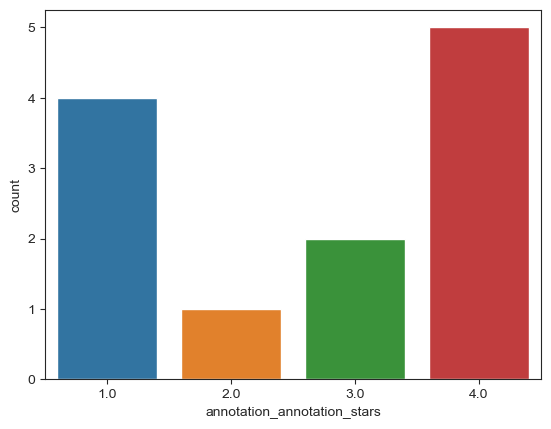

In [99]:

sns.countplot(dfs, x="annotation_annotation_stars")


In [100]:
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'annotation_annotation_stitch_to_wound_distance_is_correct',
       'annotation_annotation_distance_between_stitches_is_correct',
       'annotation_annotation_stitches_perpendicular_to_wound',
       'annotation_annotation_equal_sized_wound_portions',
       'annotation_annotation_no_excessive_tension',
       'annotation_annotation_respect_for_tissue',
       'annotation_annotation_time_and_movements',
       'annotation_annotation_instrument_handling',
       'annotation_annotation_procedure_flow', 'annotation_annotation_i'],
      dtype='object', length=485)

### Replace "," with "."

In [101]:
# find the columns where its values contain single "," and digits
dfs.columns[dfs.apply(lambda x: (x.dtype is str) and (x.str.contains(",\d").any()))]
cols = []
for col in dfs.columns:
    try:
        if (dfs[col].str.contains(",\d").any()):
            # convert , to . and change the column type to float
            dfs[col] = dfs[col].str.replace(",", ".").astype(float)
            cols.append(col)
    except:
        pass
# cols

In [102]:
# dfs

In [103]:
# print name of columns containing needle holder
# dfs.columns[dfs.columns.str.contains("Needle holder")]

In [104]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]

### If there is just one stitch, put ths information into stitch 1 measurements

In [105]:
# If column containing " stitch 1" in its name has empty values, fill them with  the values from the column with the same name but withuou " stitch 1"
for col in dfs.columns[dfs.columns.str.contains(" stitch 0")]:
    dfs[col] = dfs[col].fillna(dfs[col.replace(" stitch 0", "")])

In [106]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]


# Find the correlation

In [107]:
# count numeric values in columns
# dfs.drop(["filename", "stars_auto"], axis=1).apply(lambda x: x.dtype is float).sum()
relevant_column = "annotation_annotation_stars"
df

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,annotation_annotation_stitch_to_wound_distance_is_correct,annotation_annotation_distance_between_stitches_is_correct,annotation_annotation_stitches_perpendicular_to_wound,annotation_annotation_equal_sized_wound_portions,annotation_annotation_no_excessive_tension,annotation_annotation_respect_for_tissue,annotation_annotation_time_and_movements,annotation_annotation_instrument_handling,annotation_annotation_procedure_flow,annotation_annotation_i
0,pigleg_test.mp4,NaN,NaN,mjirik@gapps.zcu.cz,2022-06-09 16:13:04,2022-06-17 17:40:13,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pigleg_test2.mp4,NaN,NaN,mjirik@gapps.zcu.cz,2022-04-01 20:37:52,2022-06-17 17:47:07,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022.03.29.-B-Voltersen-Vera-Schweinefuß-Einze...,NaN,NaN,Vera.Voltersen@med.uni-jena.de,2022-03-30 13:57:55,2022-06-17 18:07:40,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021.11.3-B-Volkers-Einzelknopfnaht_Schweinefu...,NaN,NaN,miriam.volkers@uni-jena.de,2021-11-04 13:19:23,2022-06-17 21:36:30,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Einzelknopfnaht.mp4,NaN,NaN,anke.hilger@uni-jena.de,2021-11-07 19:14:34,2022-06-17 21:36:43,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,EinzelknopfnahtamSchweinefuss_Muenzner_Simeon.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:21:31,simeon.muenzner@uni-jena.de,2024-02-20 20:59,2024-03-01 14:39,30.0,"6,61445368","0,5008974915","0,5202454662",...,False,True,True,True,True,4.0,5.0,5.0,5.0,0.0
1635,Einzelknopfnaht_Lisa-Marie_Ney.mov,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:21:59,lisa-marie.ney@uni-jena.de,2024-02-21 05:39,2024-03-01 14:42,59.0,"4,690869129","0,476095343","0,3502952353",...,True,True,True,True,True,5.0,4.0,4.0,4.0,0.0
1636,Einzelknopfnähte.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:22:28,laurin.lindner@uni-jena.de,2024-02-21 09:22,2024-03-01 15:01,29.0,"14,894542","1,530069081","2,421791443",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637,Stresstest_Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-03-05 22:22:56,laurin.lindner@uni-jena.de,2024-02-22 21:38,2024-03-01 15:04,29.0,"10,09036711","0,6589970913","3,518668226",...,True,True,True,True,True,3.0,1.0,1.0,1.0,0.0


In [108]:
# remove columns containing " stitch 1" in their name
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 1")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 2")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 3")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 4")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 1")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 2")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 3")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 4")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("n_stitches_by_user")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("annotation_annotation_stars")], axis=1)



In [109]:
dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False)
dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False)["Needle holder stitch 0 length [m]"]



0.06145275529706787

In [110]:

dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False)


annotation_annotation_stars                 1.000000
Needle holder stitch 0 visibility [%]       0.758946
Needle holder visibility [%]                0.736948
annotation_annotation_time_and_movements    0.664605
annotation_annotation_procedure_flow        0.664605
                                              ...   
Forceps curved stitch 0 length [m]               NaN
Forceps curved stitch 0 visibility [s]           NaN
Forceps curved stitch 0 velocity                 NaN
Forceps curved stitch 0 visibility [%]           NaN
Forceps curved stitch 0 length [pix]             NaN
Name: annotation_annotation_stars, Length: 127, dtype: float64

In [115]:
# try to find the best columns to predict stars_auto
corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(10)
# corr = corr[corr.index != "stars_auto"] 

corr

annotation_annotation_stars                  1.000000
Needle holder stitch 0 visibility [%]        0.758946
Needle holder visibility [%]                 0.736948
annotation_annotation_time_and_movements     0.664605
annotation_annotation_procedure_flow         0.664605
annotation_annotation_instrument_handling    0.664605
annotation_annotation_respect_for_tissue     0.664605
Needle holder stitch 0 velocity              0.523101
Needle holder area presence [%]              0.507648
Needle holder stitch 0 area presence [%]     0.504244
Name: annotation_annotation_stars, dtype: float64

In [69]:
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# measurement_vs_annotation_separator = dfs.columns.str.contains("annotation_annotation")
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# # corr on one axis measurement, on the other annotation, just the first 10
# corr = dfs.corr(numeric_only=True).abs()
# corr





In [117]:
#select the columns containing "annotation_annotation" in their name
measurement_vs_annotation_separator = corr.index.str.contains("annotation_annotation")
measurement_vs_annotation_separator

array([ True, False, False,  True,  True,  True,  True, False, False,
       False])

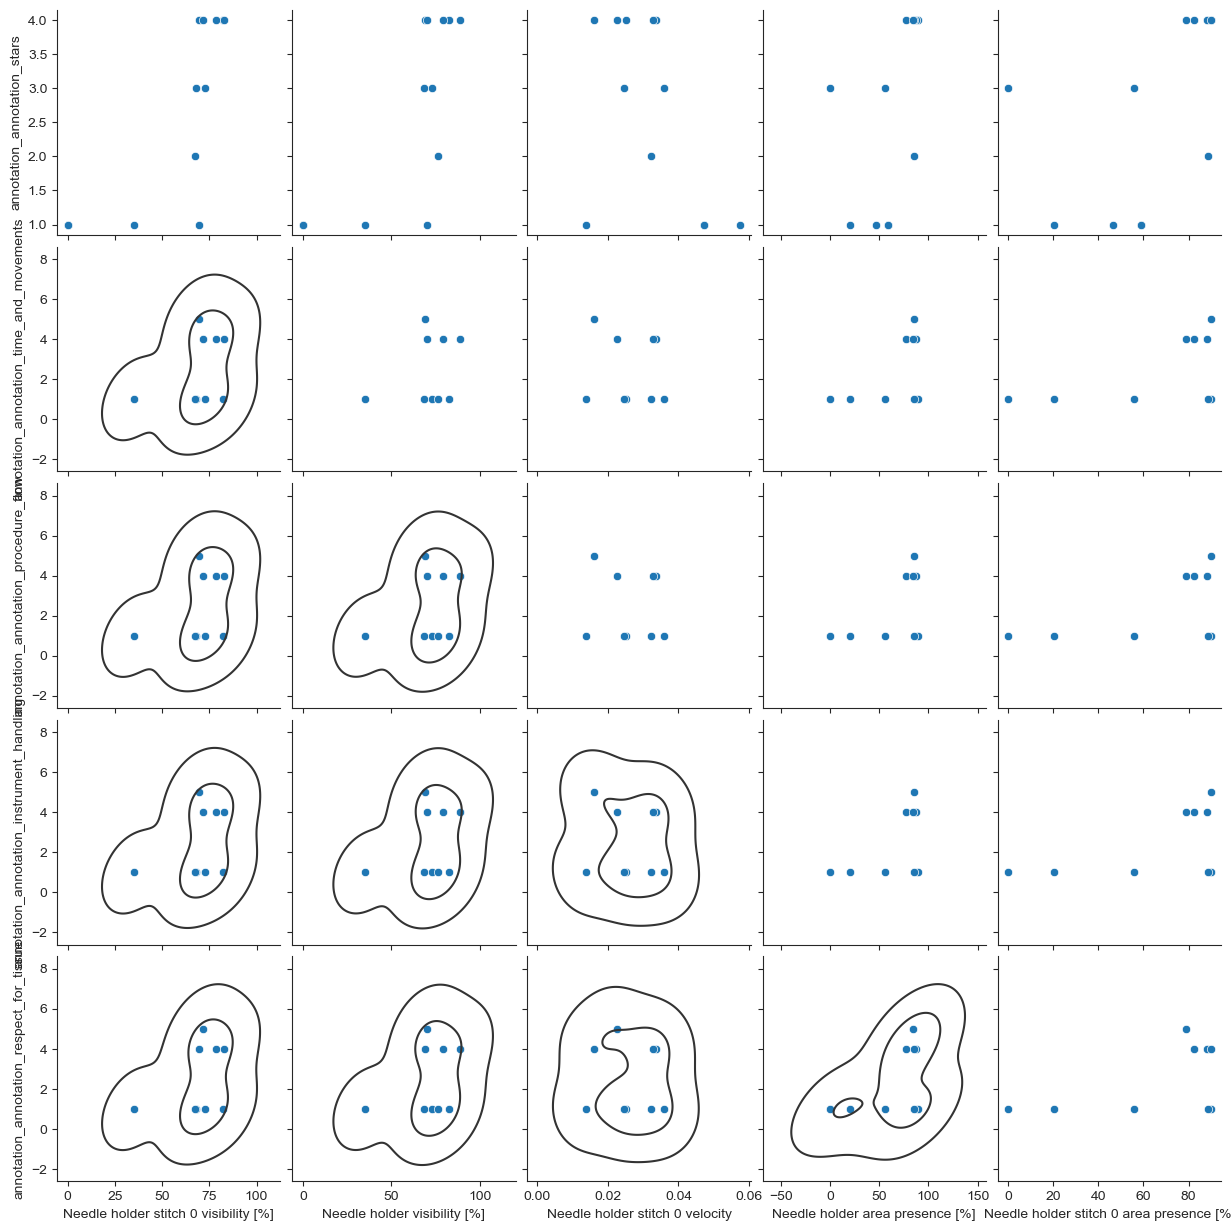

In [118]:
import seaborn as sns
g = sns.pairplot(dfs, y_vars=corr.index[measurement_vs_annotation_separator], 
             x_vars=corr.index[~measurement_vs_annotation_separator],
             # x_vars=["stars_auto"]
             # hue="n_stitches_by_user"
             )
g.map_lower(sns.kdeplot, levels=3, color=".2")

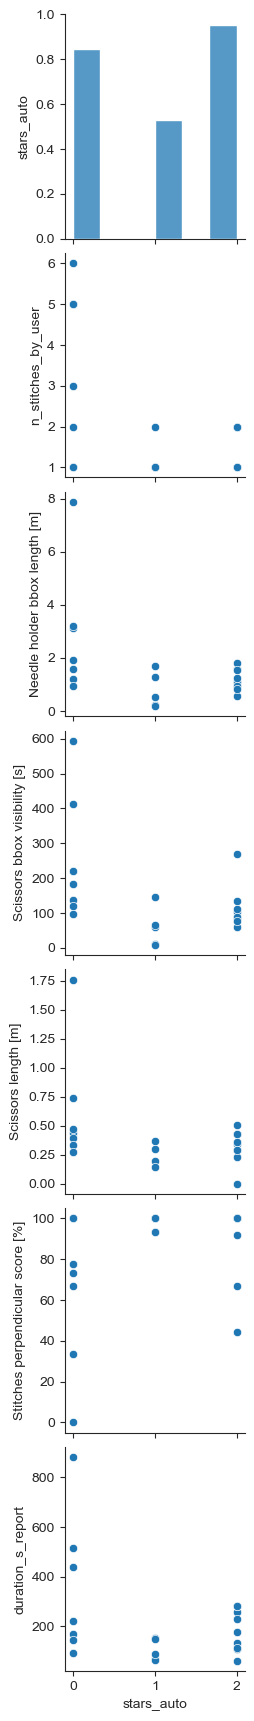

In [139]:

sns.pairplot(dfs, y_vars=corr.index,
             # x_vars=corr.index,
             x_vars=["stars_auto"]
             )


In [31]:

# corr = dfs.corr(numeric_only=True)["stars_auto"].sort_values(ascending=False).head(10)
# corr


In [42]:
# columns_to_be_removed = ["stars_auto"]
# columns = list(corr.index)
# columns = [col for col in columns if col not in columns_to_be_removed]
# columns 

# Train predictor

In [106]:
import sklearn
# train a model to predict stars_auto
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import SVM
from sklearn.svm import SVR
#train a model to predict stars_auto

columns = list(corr.index)

columns.append("filename")
if "stars_auto" not in columns:
    columns.append("stars_auto") 

dfsx = dfs[columns]
print(len(dfsx))
dfsx = dfsx.dropna()
print(len(dfsx))
X = dfsx[columns].drop("stars_auto", axis=1).drop("filename", axis=1)
y = dfsx["stars_auto"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = SVR()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)
# 
# X
from sklearn.neural_network import MLPClassifier
# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


22
19


-0.16755625811483132

0.25

In [108]:
# dfsx

,stars_auto,Needle holder bbox length [m],Scissors bbox visibility [s],Scissors length [m],Stitches perpendicular score [%],duration_s_report,Right hand bbox length [m],filename
922,2,1.589949,268.933333,0.426047,100.000000,257.325297,2.557326,Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4
924,2,1.072114,85.133333,0.340322,44.444444,108.413014,2.759852,Bad-2021_11_03_A_Petersen_Insa_Einzelknopfnaht...
925,2,0.579255,133.466667,0.289062,91.666667,131.291886,0.806121,Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...
926,2,1.230654,103.666667,0.230395,100.000000,109.984839,1.620004,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...
927,2,1.795589,58.466667,0.426033,66.666667,280.195177,5.420261,Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnah...
928,0,1.189138,96.000000,0.438470,66.666667,93.621097,2.319931,Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_...
930,1,0.530351,59.466667,0.196998,93.333333,68.207113,1.222764,Medium-2021_10_12_B_Westermann_Lammers_Johanna...
931,1,0.228311,64.800000,0.301583,100.000000,62.171284,1.263741,Medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...
933,1,1.295474,146.466667,0.368854,100.000000,150.856321,4.968225,Medium-2021_11_03_A_Seifert_Johanna_Einzelknop...
934,0,7.869666,413.533333,0.395279,33.333333,438.518514,11.798714,Good-2021_11_17_A_Gramlich_Judith_Stresstest_E...


## Score

In [147]:
clf.score(X_test, y_test)

0.25

In [148]:
clf.score(X_train, y_train)

0.8

## Check the předictions

In [149]:
y_test

922    2
928    0
939    0
924    2
Name: stars_auto, dtype: int32

In [150]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 0, 0])

In [113]:
clf.predict(X_train)


array([0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1])

In [114]:
y_train

933    1
945    0
926    2
942    2
944    2
947    2
925    2
934    0
948    0
927    2
940    0
931    1
938    1
943    0
930    1
Name: stars_auto, dtype: int32

In [117]:

# sns.histplot(dfs, x="n_stitches_by_user")
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Scissors stitch 0 area presence [%]',
       'Needle holder stitch 0 length [pix]', 'Forceps stitch 0 length [pix]',
       'Scissors stitch 0 length [pix]',
       'Needle holder bbox stitch 0 length [pix]',
       'Forceps bbox stitch 0 length [pix]',
       'Scissors bbox stitch 0 length [pix]',
       'Left hand bbox stitch 0 length [pix]',
       'Right hand bbox stitch 0 length [pix]', 'stars_auto'],
      dtype='object', length=218)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

816    2
842    0
840    0
822    2
Name: stars_auto, dtype: int32

<AxesSubplot: xlabel='n_stitches_by_user', ylabel='Count'>

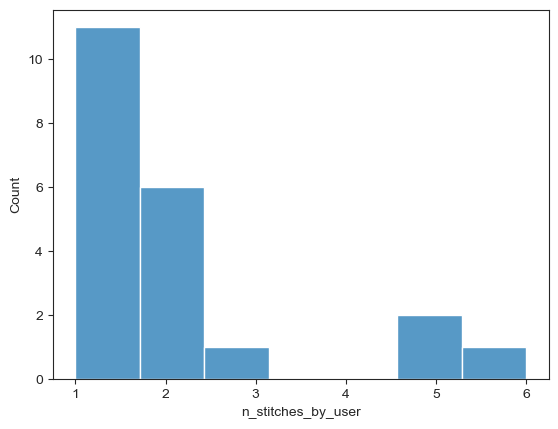

In [146]:
sns.histplot(dfs, x="n_stitches_by_user", 
             # hue="stars_auto"
             )